# Activity 2.02: Fitting a Multiple Log-Linear Regression Model

In [1]:
#2
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg 
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [2]:
#3 load dataset into dataframe
rawBostonData = pd.read_csv('Boston.csv')

In [3]:
#4 inspect first 5 rows of dataframe
rawBostonData.head()

CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [4]:
#5 drop null values
rawBostonData = rawBostonData.dropna()

In [5]:
#6 check for duplicate records
rawBostonData = rawBostonData.drop_duplicates()

In [6]:
#7 list the column names of the dataframe
rawBostonData.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
#8 rename column names to something meaningful
renamedBostonData = rawBostonData.rename(columns={'CRIM':'crimeRatePerCapita', ' ZN ':'landOver25k_sqft', 'INDUS ':'nonRetailLandProptn', 'CHAS':'riverDummy', 'NOX':'nitrixOxide_pp10m', 'RM':'AvgNo.RoomsPerDwelling', 'AGE': 'ProptnOwnerOccupied', 'DIS':'weightedDist', 'RAD':'radialHighwayAccess','TAX':'propTaxRate_per10k', 'PTRATIO':'pupilTeacherRatio', 'LSTAT':'pctLowerStatus', 'MEDV':'medianValue_Ks'})

In [8]:
renamedBostonData

crimeRatePerCapita  landOver25k_sqft  nonRetailLandProptn  riverDummy  \
0               0.00632              18.0                 2.31           0   
1               0.02731               0.0                 7.07           0   
2               0.02729               0.0                 7.07           0   
3               0.03237               0.0                 2.18           0   
4               0.06905               0.0                 2.18           0   
..                  ...               ...                  ...         ...   
501             0.06263               0.0                11.93           0   
502             0.04527               0.0                11.93           0   
503             0.06076               0.0                11.93           0   
504             0.10959               0.0                11.93           0   
505             0.04741               0.0                11.93           0   

     nitrixOxide_pp10m  AvgNo.RoomsPerDwelling  ProptnOwnerOccupied  \
0                0.538                   6.575                 65.2   
1                0.469                   6.421                 78.9   
2                0.469                   7.185                 61.1   
3                0.458                   6.998                 45.8   
4                0.458                   7.147                 54.2   
..                 ...                     ...                  ...   
501              0.573                   6.593                 69.1   
502              0.573                   6.120                 76.7   
503              0.573                   6.976                 91.0   
504              0.573                   6.794                 89.3   
505              0.573                   6.030                 80.8   

     weightedDist  radialHighwayAccess  propTaxRate_per10k  pupilTeacherRatio  \
0          4.0900                    1                 296               15.3   
1          4.9671                    2                 242               17.8   
2          4.9671                    2                 242               17.8   
3          6.0622                    3                 222               18.7   
4          6.0622                    3                 222               18.7   
..            ...                  ...                 ...                ...   
501        2.4786                    1                 273               21.0   
502        2.2875                    1                 273               21.0   
503        2.1675                    1                 273               21.0   
504        2.3889                    1                 273               21.0   
505        2.5050                    1                 273               21.0   

     pctLowerStatus  medianValue_Ks  
0              4.98            24.0  
1              9.14            21.6  
2              4.03            34.7  
3              2.94            33.4  
4              5.33            36.2  
..              ...             ...  
501            9.67            22.4  
502            9.08            20.6  
503            5.64            23.9  
504            6.48            22.0  
505            7.88            11.9  

[506 rows x 13 columns]

In [9]:
#9 inspect the data types of the colums
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25k_sqft        506 non-null    float64
 2   nonRetailLandProptn     506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwayAccess     506 non-null    int64  
 9   propTaxRate_per10k      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [10]:
#10 calculate basic stats for numeric columns in dataframe
renamedBostonData.describe(include=[np.number]).T

# .T transposes the output of describe function to get better layout

count        mean         std        min         25%  \
crimeRatePerCapita      506.0    3.613524    8.601545    0.00632    0.082045   
landOver25k_sqft        506.0   11.363636   23.322453    0.00000    0.000000   
nonRetailLandProptn     506.0   11.136779    6.860353    0.46000    5.190000   
riverDummy              506.0    0.069170    0.253994    0.00000    0.000000   
nitrixOxide_pp10m       506.0    0.554695    0.115878    0.38500    0.449000   
AvgNo.RoomsPerDwelling  506.0    6.284634    0.702617    3.56100    5.885500   
ProptnOwnerOccupied     506.0   68.574901   28.148861    2.90000   45.025000   
weightedDist            506.0    3.795043    2.105710    1.12960    2.100175   
radialHighwayAccess     506.0    9.549407    8.707259    1.00000    4.000000   
propTaxRate_per10k      506.0  408.237154  168.537116  187.00000  279.000000   
pupilTeacherRatio       506.0   18.455534    2.164946   12.60000   17.400000   
pctLowerStatus          506.0   12.653063    7.141062    1.73000    6.950000   
medianValue_Ks          506.0   22.532806    9.197104    5.00000   17.025000   

                              50%         75%       max  
crimeRatePerCapita        0.25651    3.677082   88.9762  
landOver25k_sqft          0.00000   12.500000  100.0000  
nonRetailLandProptn       9.69000   18.100000   27.7400  
riverDummy                0.00000    0.000000    1.0000  
nitrixOxide_pp10m         0.53800    0.624000    0.8710  
AvgNo.RoomsPerDwelling    6.20850    6.623500    8.7800  
ProptnOwnerOccupied      77.50000   94.075000  100.0000  
weightedDist              3.20745    5.188425   12.1265  
radialHighwayAccess       5.00000   24.000000   24.0000  
propTaxRate_per10k      330.00000  666.000000  711.0000  
pupilTeacherRatio        19.05000   20.200000   22.0000  
pctLowerStatus           11.36000   16.955000   37.9700  
medianValue_Ks           21.20000   25.000000   50.0000

In [11]:
#11 divide the dataset into training and test sets; train the dataset(s)
X = renamedBostonData.drop('crimeRatePerCapita', axis=1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_data_size,random_state=seed)
train_data = pd.concat([X_train,y_train], axis=1)
test_data = pd.concat([X_test,y_test], axis=1)

In [12]:
# correlation matrix of on renamedBostonData
corrMatrix = train_data.corr(method='pearson')
corrMatrix

landOver25k_sqft  nonRetailLandProptn  riverDummy  \
landOver25k_sqft                1.000000            -0.540095   -0.059189   
nonRetailLandProptn            -0.540095             1.000000    0.065271   
riverDummy                     -0.059189             0.065271    1.000000   
nitrixOxide_pp10m              -0.520305             0.758178    0.091469   
AvgNo.RoomsPerDwelling          0.355346            -0.399166    0.107996   
ProptnOwnerOccupied            -0.577457             0.667887    0.106329   
weightedDist                    0.659340            -0.728968   -0.098551   
radialHighwayAccess            -0.311920             0.580813    0.022731   
propTaxRate_per10k             -0.324172             0.702973   -0.007864   
pupilTeacherRatio              -0.424612             0.398513   -0.094255   
pctLowerStatus                 -0.435827             0.607457   -0.041110   
medianValue_Ks                  0.422574            -0.508338    0.136831   
crimeRatePerCapita             -0.198455             0.387471   -0.044587   

                        nitrixOxide_pp10m  AvgNo.RoomsPerDwelling  \
landOver25k_sqft                -0.520305                0.355346   
nonRetailLandProptn              0.758178               -0.399166   
riverDummy                       0.091469                0.107996   
nitrixOxide_pp10m                1.000000               -0.306510   
AvgNo.RoomsPerDwelling          -0.306510                1.000000   
ProptnOwnerOccupied              0.742016               -0.263085   
weightedDist                    -0.776311                0.215439   
radialHighwayAccess              0.606721               -0.183000   
propTaxRate_per10k               0.662164               -0.280341   
pupilTeacherRatio                0.206809               -0.350828   
pctLowerStatus                   0.603656               -0.586573   
medianValue_Ks                  -0.453424                0.666761   
crimeRatePerCapita               0.405813               -0.167258   

                        ProptnOwnerOccupied  weightedDist  \
landOver25k_sqft                  -0.577457      0.659340   
nonRetailLandProptn                0.667887     -0.728968   
riverDummy                         0.106329     -0.098551   
nitrixOxide_pp10m                  0.742016     -0.776311   
AvgNo.RoomsPerDwelling            -0.263085      0.215439   
ProptnOwnerOccupied                1.000000     -0.751059   
weightedDist                      -0.751059      1.000000   
radialHighwayAccess                0.458717     -0.494932   
propTaxRate_per10k                 0.515376     -0.543333   
pupilTeacherRatio                  0.289976     -0.259140   
pctLowerStatus                     0.639881     -0.522120   
medianValue_Ks                    -0.419062      0.289658   
crimeRatePerCapita                 0.355730     -0.378997   

                        radialHighwayAccess  propTaxRate_per10k  \
landOver25k_sqft                  -0.311920           -0.324172   
nonRetailLandProptn                0.580813            0.702973   
riverDummy                         0.022731           -0.007864   
nitrixOxide_pp10m                  0.606721            0.662164   
AvgNo.RoomsPerDwelling            -0.183000           -0.280341   
ProptnOwnerOccupied                0.458717            0.515376   
weightedDist                      -0.494932           -0.543333   
radialHighwayAccess                1.000000            0.908578   
propTaxRate_per10k                 0.908578            1.000000   
pupilTeacherRatio                  0.462290            0.462556   
pctLowerStatus                     0.456592            0.528029   
medianValue_Ks                    -0.383132           -0.478903   
crimeRatePerCapita                 0.608838            0.565035   

                        pupilTeacherRatio  pctLowerStatus  medianValue_Ks  \
landOver25k_sqft                -0.424612       -0.435827        0.422574   
nonRetailLandProptn           

### You are also encouraged to include the interaction of these variables to order two in your model.

In [13]:
# nonretailLandProptn nitrixOxide_pp10m radialHighwayAccess propTaxRate_per10k pctLowerStatus

# define linear regressions model
multiLinearModel = smf.ols(formula='np.log(crimeRatePerCapita) ~ (nitrixOxide_pp10m + radialHighwayAccess + propTaxRate_per10k + pctLowerStatus) **2', data=train_data)


In [14]:
multiLinearModelResults = multiLinearModel.fit()
print(multiLinearModelResults.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.879
Model:                                    OLS   Adj. R-squared:                  0.875
Method:                         Least Squares   F-statistic:                     248.1
Date:                        Wed, 22 Sep 2021   Prob (F-statistic):          2.23e-150
Time:                                08:29:57   Log-Likelihood:                -402.63
No. Observations:                         354   AIC:                             827.3
Df Residuals:                             343   BIC:                             869.8
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### You should produce graphs and data that show that your model satisfies the assumptions of linear regression.

#### Assumption 1) The relationship between the dependent and independent variables must be linear and additive.This means that the relationship must be of the straight-line type, and if there are many independent variables involved, thus multiple linear regression, the weighted sum of these independent variables must be able to explain the variability in the dependent variable.

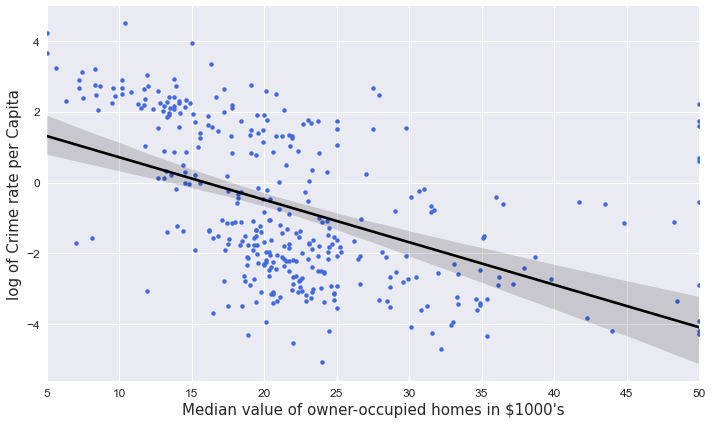

In [15]:
# define canvas and a graph object in Python
fig, ax = plt.subplots(figsize=(10,6))
y = np.log(train_data['crimeRatePerCapita']) #use lograthim function to transform dependant variable
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax, color='k', scatter_kws={"s":20,"color":"royalblue","alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()